🔍 PACE Framework + Python para Análisis de Datos

📌 1. Plan (Planificar)

Objetivo del Proyecto:

Análisis de ventas de una tienda en línea: Vas a realizar un análisis exploratorio de datos (EDA) sobre las ventas de una tienda en línea. El conjunto de datos incluirá información sobre productos, ventas, fechas, precios, categorías y demás variables útiles para el análisis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

📊 2. Analyze (Analizar) - Exploratory Data Analysis (EDA)

In [2]:
# Cargar y explorar los datos
df_sales = pd.read_csv('./csv/sales.csv')
df_sales.head()

,OrderID,ProductID,ProductCategory,QuantitySold,UnitPrice,TotalSale,OrderDate,CustomerRegion
0,1,P004,Deportes,5,70.08,350.40,2024-01-01,Este
1,2,P005,Deportes,4,121.78,487.12,2024-01-02,Norte
2,3,P003,Electrónica,3,139.77,419.31,2024-01-03,Este
3,4,P005,Deportes,3,95.87,287.61,2024-01-04,Oeste
4,5,P005,Hogar,4,145.62,582.48,2024-01-05,Sur


In [3]:
df_sales.describe()

,OrderID,QuantitySold,UnitPrice,TotalSale
count,300.000000,300.00000,300.000000,300.000000
mean,150.500000,4.82000,108.671900,527.881300
std,86.746758,2.57482,51.920397,408.109811
min,1.000000,1.00000,10.440000,18.390000
25%,75.750000,3.00000,69.177500,184.350000
50%,150.500000,5.00000,111.300000,422.495000
75%,225.250000,7.00000,151.447500,751.565000
max,300.000000,9.00000,199.880000,1796.040000


In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          300 non-null    int64  
 1   ProductID        300 non-null    object 
 2   ProductCategory  300 non-null    object 
 3   QuantitySold     300 non-null    int64  
 4   UnitPrice        300 non-null    float64
 5   TotalSale        300 non-null    float64
 6   OrderDate        300 non-null    object 
 7   CustomerRegion   300 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 18.9+ KB


In [5]:
#verificar valores nulos
df_sales.isna() .sum()

OrderID            0
ProductID          0
ProductCategory    0
QuantitySold       0
UnitPrice          0
TotalSale          0
OrderDate          0
CustomerRegion     0
dtype: int64

In [6]:
# Verifiar valores duplicados
df_sales.duplicated().sum()

np.int64(0)

In [7]:
# Transformamos la calumna fecha a formato fecha
df_sales['OrderDate'] = pd.to_datetime(df_sales['OrderDate'])
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          300 non-null    int64         
 1   ProductID        300 non-null    object        
 2   ProductCategory  300 non-null    object        
 3   QuantitySold     300 non-null    int64         
 4   UnitPrice        300 non-null    float64       
 5   TotalSale        300 non-null    float64       
 6   OrderDate        300 non-null    datetime64[ns]
 7   CustomerRegion   300 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 18.9+ KB


🛠️ 3. Construct (Construir) - Aplicar análisis con Python

¿Qué categorías tiene más ventas?

In [8]:
# Agrupar los datos por categorías 
categoria_mas_ventas = df_sales.groupby('ProductCategory')['TotalSale'].sum()

# Ordenar los datos obtenidos
categoria_mas_ventas_descentende = categoria_mas_ventas.sort_values(ascending=False)

categoria_mas_ventas_descentende


ProductCategory
Deportes       39060.36
Ropa           34532.78
Electrónica    33898.37
Alimentos      27712.26
Hogar          23160.62
Name: TotalSale, dtype: float64

¿Cómo varian las ventas mes a mes?

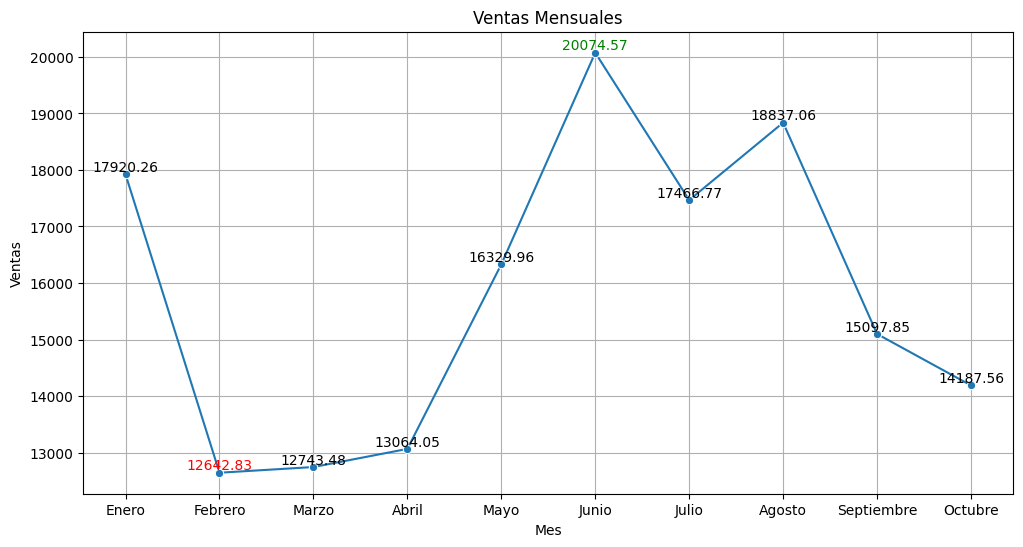

Valor maxímo: 20074.57
Valor minimo: 12642.83


In [55]:
from pandas.api.types import CategoricalDtype

#Creamos una columna mes 
df_sales['Month'] = df_sales['OrderDate'].dt.month_name(locale='es_ES')
# df_sales_ordenado = df_sales.sort_values(by='OrderDate' )

# Agrupamos las ventas por mes
mes_ventas_variaciones = df_sales.groupby('Month')['TotalSale'].sum()

# Definir el orden de los meses
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Convertir la columna 'Mes' a un tipo categórico con el orden definido
mes_ventas_variaciones.index = pd.Categorical(mes_ventas_variaciones.index, categories=orden_meses, ordered=True)

# Ordenar por el índice (mes)
ventas_mensuales = mes_ventas_variaciones.sort_index()

# Calcular el valor mínimo y máximo
min_ventas = ventas_mensuales.min()
max_ventas = ventas_mensuales.max()

# VIsualización del grafíco 
plt.figure(figsize=(12, 6))
sns.lineplot(x=ventas_mensuales.index, y=ventas_mensuales.values, marker='o')

# Agregar los valores de ventas en cada punto con colores para min y max
for x, y in zip(ventas_mensuales.index, ventas_mensuales.values):
    color = 'black'  # Color por defecto
    if y == min_ventas:
        color = 'red'  # Color para el mínimo
    elif y == max_ventas:
        color = 'green'  # Color para el máximo
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', color=color)

plt.title('Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

print(f'''Valor maxímo: {max_ventas}
Valor minimo: {min_ventas}''')

¿Qué productos están liderando las ventas?

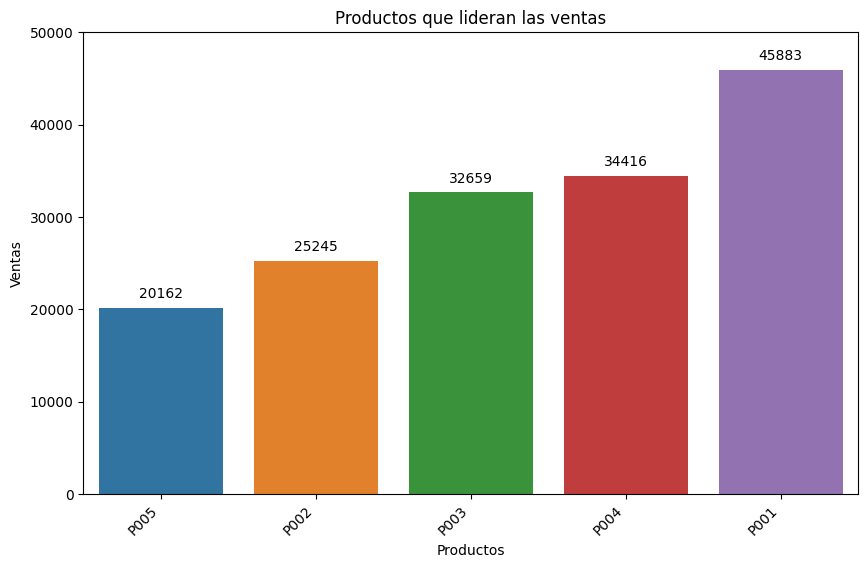

In [ ]:
# Agrupamos los datos por producto
productos_liderando_ventas = df_sales.groupby('ProductID')['TotalSale'].sum()

#Ordenamos los datos de menor a mayor
productos_liderando_ventas_ordenados = productos_liderando_ventas.sort_values()

# Definimos el tamaño del gráfico
plt.figure(figsize=(10,6))

#Creamos el gráfico 
ax = sns.barplot(x=productos_liderando_ventas_ordenados.index, y=productos_liderando_ventas_ordenados.values, 
            hue=productos_liderando_ventas_ordenados.index)

# Rotamos las etiquetas y aumentamos el limite de Y 
plt.xticks(rotation=45, ha='right')
plt.ylim(0,50000)

plt.xlabel('Productos')
plt.ylabel('Ventas')
plt.title('Productos que lideran las ventas')

# Agregar valors encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.00f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Mostramos el gráfico
plt.show()

¿Hay alguna relación entre el precio y la cantidad vendida?

<function matplotlib.pyplot.show(close=None, block=None)>

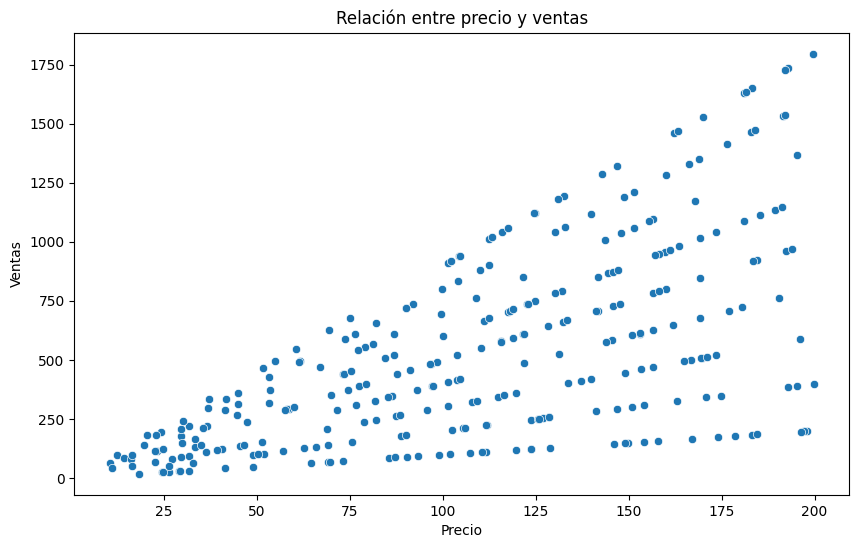

In [81]:
# Determina el tamaño del gráfico
plt.figure(figsize=(10,6))

# Creación de gráfuico
sns.scatterplot(x='UnitPrice',y='TotalSale', data=df_sales )

#Agregamos los titulos
plt.xlabel('Precio')
plt.ylabel('Ventas')
plt.title('Relación entre precio y ventas')

plt.show

In [80]:
correlacion = df_sales['UnitPrice'].corr(df_sales['TotalSale'])
print(f'Coeficiente de correlación: {correlacion}')

Coeficiente de correlación: 0.6337796394516689
